### Data Wrangling Project

Name: <b>Roshan Wahane</b>

Date: 16/10/2018

Writing Python 3 code to integrate several datasets to one single schema and find and fix possible problems in the data. Each of the 7 datasets are in various formats and the data is about housing information in Victoria, Australia.

The 7 datasets are: - <br>
1) hospitals.html (information about the hospitals in Victoria)<br>
2) real_estate.json (real estate information in Victoria)<br>
3) real_estate.xml (real estate information in Victoria)<br>
4) supermarkets.csv (supermarket information in Victoria)<br>
5) GTFS_Melbourne_Train_Information (train schedules by PTV)<br>
6) suburb shape files (information of different suburbs of Victoria in shp file format)<br>
7) shoppingcentres.json (shopping centre information in Victoria)<br>

Environment: Python 3.6.5 and Jupyter notebook Libraries used:

- pandas
- numpy
- matplotlib
- math
- itertools
- collections
- statistics
- sklearn
- matplotlib
- os
- zipfile

# Task 1: Data Integration

In this step we are integrating these 7 datasets into one schema.

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
%matplotlib inline
import json
import xml.etree.ElementTree as ET
import math
from datetime import timedelta

In [2]:
!pip install pyshp

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Read the datasets

##### Reading hospitals.html and converting it into a dataframe

In [3]:
hospital = pd.read_html('hospitals.html', header=0)

In [4]:
print(type(hospital))

<class 'list'>


In [5]:
hospital = hospital[0]

In [6]:
hospital.columns

Index(['Unnamed: 0', 'id', 'lat', 'lng', 'name'], dtype='object')

In [7]:
hospital.set_index('Unnamed: 0', inplace=True)

In [8]:
hospital.iloc[0:10, :]

,id,lat,lng,name
Unnamed: 0,,,,
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital
5,hospital_006,-36.359274,145.410832,Shepparton Private Hospital
6,hospital_007,-37.774573,144.923973,Ascot Vale Road Specialist Rooms
7,hospital_008,-37.849467,145.226801,Knox Private Hospital
8,hospital_009,-37.869801,145.003096,Masada Private Hospital


##### Reading real_estate.json file and converting it into a dataframe

In [9]:
with open('real_state.json', 'r') as f:
    data = json.load(f)
real_statejson = pd.DataFrame(data)

In [10]:
real_statejson.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,40 Victoria Street,2.0,4.0,-37.783004,145.144749,2.0,14000000.0,51396.0,house,2015.0
1,16 Edinburgh Street,1.0,2.0,-37.823492,145.005719,0.0,9060000.0,52431.0,house,2015.0
2,24 Goldsmith Avenue,2.0,3.0,-37.716585,144.777206,1.0,4455000.0,12742.0,house,2016.0
3,18/114 Warren Road,1.0,3.0,-37.991135,145.093967,2.0,7536000.0,92856.0,house,2012.0
4,24 Cuthbert Street,2.0,4.0,-37.737755,144.883148,2.0,6680000.0,15625.0,house,2009.0


In [11]:
real_statejson.columns

Index(['addr_street', 'bathrooms', 'bedrooms', 'lat', 'lng', 'parking_space',
       'price', 'property_id', 'property_type', 'year'],
      dtype='object')

In [12]:
print(type(real_statejson))

<class 'pandas.core.frame.DataFrame'>


In [13]:
real_statejson.isnull().sum()

addr_street      2
bathrooms        2
bedrooms         2
lat              2
lng              2
parking_space    2
price            2
property_id      2
property_type    2
year             2
dtype: int64

##### Reading shoppingcentres.json file and converting it into a dataframe

In [14]:
with open('shopingcenters.json', 'r') as f:
    data = json.load(f)
sc_json = pd.DataFrame(data)

In [15]:
sc_json.head()

,lat,lng,sc_id
0,-37.767915,145.041790,SC_001
1,-37.819375,145.171472,SC_002
2,-37.971131,145.089065,SC_003
3,-35.280406,149.132550,SC_004
4,-37.574572,144.920452,SC_005


In [16]:
sc_json.isnull().sum()

lat      0
lng      0
sc_id    0
dtype: int64

##### Reading real_state.xml file and converting it into a dataframe

In [17]:
tree = ET.parse('real_state.xml')
root = tree.getroot()

In [18]:
print(tree)

In [19]:
root.tag

'root'

In [20]:
root.attrib

{}

In [21]:
for sub_root in root:
    print(sub_root.tag) # Checking all the sub level root of the xml file to get the column names

bathrooms
price
bedrooms
parking_space
year
lat
lng
property_type
addr_street
property_id


In [22]:
# Creating a list of all columns for the dataframe from the xml
dfcols = ['bathrooms', 'price', 'bedrooms', 'parking_space', 'year', 'lat', 'lng', 'property_type', 'addr_street', 'property_id']

In [23]:
full_list = []

In [24]:
for each in dfcols:
    for child in root:
        for grand_child in child:
            if each == child.tag:
                full_list.append({each:grand_child.text})


In [25]:
full_list[0:5]

[{'bathrooms': '1.0'},
 {'bathrooms': '1.0'},
 {'bathrooms': '1.0'},
 {'bathrooms': '1.0'},
 {'bathrooms': '2.0'}]

In [26]:
temp_pddict = {}

In [27]:
pddict = {}

In [28]:
# declaring empty lists for each attribute. These lists will later be converted into dictionaries and then will the help of dictionaries, I will be creating the dataframe

In [29]:
bathrooms = []
price = []
bedrooms = []
parking_space = []
year = []
lat = []
lng = []
property_type = []
addr_street = []
property_id = []

In [30]:
# after putting all the content of the xml file into one list, the below code will create individual list as per columns in the dictionary format

In [31]:
for each in full_list:
    for key, value in each.items():
        if key == 'bathrooms':
            bathrooms.append(value)
            temp_pddict['bathrooms'] = bathrooms
            pddict.update(temp_pddict)
        if key == 'price':
            price.append(value)
            temp_pddict['price'] = price
            pddict.update(temp_pddict)
        if key == 'bedrooms':
            bedrooms.append(value)
            temp_pddict['bedrooms'] = bedrooms
            pddict.update(temp_pddict)
        if key == 'parking_space':
            parking_space.append(value)
            temp_pddict['parking_space'] = parking_space
            pddict.update(temp_pddict)
        if key == 'year':
            year.append(value)
            temp_pddict['year'] = year
            pddict.update(temp_pddict)
        if key == 'lat':
            lat.append(value)
            temp_pddict['lat'] = lat
            pddict.update(temp_pddict)
        if key == 'lng':
            lng.append(value)
            temp_pddict['lng'] = lng
            pddict.update(temp_pddict)
        if key == 'property_type':
            property_type.append(value)
            temp_pddict['property_type'] = property_type
            pddict.update(temp_pddict)
        if key == 'addr_street':
            addr_street.append(value)
            temp_pddict['addr_street'] = addr_street
            pddict.update(temp_pddict)
        if key == 'property_id':
            property_id.append(value)
            temp_pddict['property_id'] = property_id
            pddict.update(temp_pddict)
                      

In [32]:
temp_pddict

{'bathrooms': ['1.0',
  '1.0',
  '1.0',
  '1.0',
  '2.0',
  '3.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '2.0',
  '2.0',
  '1.0',
  '2.0',
  '2.0',
  '1.0',
  '1.0',
  '2.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '2.0',
  '1.0',
  '2.0',
  '1.0',
  '2.0',
  '1.0',
  '1.0',
  '2.0',
  '1.0',
  '1.0',
  '2.0',
  '2.0',
  '2.0',
  '1.0',
  '2.0',
  '2.0',
  '3.0',
  '1.0',
  '1.0',
  '2.0',
  '2.0',
  '1.0',
  '2.0',
  '2.0',
  '1.0',
  '2.0',
  '2.0',
  '2.0',
  '2.0',
  'nan',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '2.0',
  '2.0',
  '1.0',
  '2.0',
  '3.0',
  '2.0',
  '1.0',
  '2.0',
  '2.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '2.0',
  '2.0',
  '1.0',
  '1.0',
  '1.0',
  '3.0',
  '3.0',
  '1.0',
  '2.0',
  '1.0',
  '3.0',
  '2.0',
  '2.0',
  '2.0',
  '2.0',
  '3.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '2.0',
  '1.0',
  '2.0',
  '2.0',
  '2.0',
  '2.0',
  '3.0',
  '1.0',
  '2.0',
  '2.0',
  '2.0

In [33]:
# creating dataframe from the created dictionary where we have values in key, value pair
realstate_dfxml = pd.DataFrame.from_dict(pddict)

In [34]:
print(type(realstate_dfxml))

<class 'pandas.core.frame.DataFrame'>


In [35]:
realstate_dfxml.head(10)

,bathrooms,price,bedrooms,parking_space,year,lat,lng,property_type,addr_street,property_id
0,1.0,3080000.0,3.0,1.0,2007.0,-37.82070541,145.2135315,house,43 Heatherdale Road,61989.0
1,1.0,12448000.0,3.0,1.0,2015.0,-37.743989,144.971767,house,29 Richards Street,22502.0
2,1.0,6409000.0,4.0,3.0,2014.0,-37.714287,145.033601,house,25 Green Avenue,40152.0
3,1.0,16200000.0,4.0,1.0,2012.0,-37.830942,145.042873,house,2 Inverleith Street,54217.0
4,2.0,3820000.0,4.0,2.0,2013.0,-37.808503,145.241229,house,2/302 Maroondah Highway,61517.0
5,3.0,37570000.0,5.0,2.0,2012.0,-37.836733,145.09737,house,39 Webster Street,55611.0
6,1.0,6600000.0,3.0,0.0,2012.0,-37.768449,144.990107,house,101 Arthurton Road,29211.0
7,1.0,4560000.0,2.0,2.0,2011.0,-37.847683,144.864382,house,32 Rosshire Road,4372.0
8,1.0,4950000.0,1.0,1.0,2011.0,-37.847801,144.871995,house,1/3 Jubilee Street,4024.0
9,1.0,5830000.0,2.0,1.0,2015.0,-37.714915,145.151013,house,2/30 Arthur Street,46820.0


In [36]:
realstate_dfxml.columns

Index(['bathrooms', 'price', 'bedrooms', 'parking_space', 'year', 'lat', 'lng',
       'property_type', 'addr_street', 'property_id'],
      dtype='object')

In [37]:
realstate_dfxml.isnull().sum()

bathrooms        0
price            0
bedrooms         0
parking_space    0
year             0
lat              0
lng              0
property_type    0
addr_street      0
property_id      0
dtype: int64

In [38]:
realstate_dfxml.shape

(1003, 10)

In [39]:
realstate_dfxml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 10 columns):
bathrooms        1003 non-null object
price            1003 non-null object
bedrooms         1003 non-null object
parking_space    1003 non-null object
year             1003 non-null object
lat              1003 non-null object
lng              1003 non-null object
property_type    1003 non-null object
addr_street      1003 non-null object
property_id      1003 non-null object
dtypes: object(10)
memory usage: 78.4+ KB


##### Reading supermarkets.xlsx file and converting it into a dataframe

In [40]:
supermarkets = pd.read_excel('supermarkets.xlsx')

In [41]:
print(type(supermarkets))

<class 'pandas.core.frame.DataFrame'>


In [42]:
supermarkets.head()

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths


In [43]:
supermarkets.duplicated().sum()

0

In [44]:
supermarkets[supermarkets['id'] == 'S_226']

,id,lat,lng,type
225,S_226,-37.86685,145.2204,Coles


In [45]:
supermarkets[supermarkets['id'] == 'S_227']

,id,lat,lng,type
226,S_227,-37.86685,145.2204,Coles


##### In this step we will be merging the real estate dataframes created into one dataframe

In [46]:
real_statejson.columns

Index(['addr_street', 'bathrooms', 'bedrooms', 'lat', 'lng', 'parking_space',
       'price', 'property_id', 'property_type', 'year'],
      dtype='object')

In [47]:
realstate_dfxml.columns

Index(['bathrooms', 'price', 'bedrooms', 'parking_space', 'year', 'lat', 'lng',
       'property_type', 'addr_street', 'property_id'],
      dtype='object')

In [48]:
real_statejson.shape

(1010, 10)

In [49]:
realstate_dfxml.shape

(1003, 10)

In [50]:
# we are now merging the created real_estate dataframes from two different file formats into one dataframe
real_estate = pd.concat([real_statejson, realstate_dfxml], sort=False)

In [51]:
real_estate.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
0,40 Victoria Street,2,4,-37.783,145.145,2,1.4e+07,51396,house,2015
1,16 Edinburgh Street,1,2,-37.8235,145.006,0,9.06e+06,52431,house,2015
2,24 Goldsmith Avenue,2,3,-37.7166,144.777,1,4.455e+06,12742,house,2016
3,18/114 Warren Road,1,3,-37.9911,145.094,2,7.536e+06,92856,house,2012
4,24 Cuthbert Street,2,4,-37.7378,144.883,2,6.68e+06,15625,house,2009


##### Checking to see if there are duplicate values

In [52]:
# there might be a possibility that same house information might be available in the provided real_estate files

In [53]:
real_estate.duplicated().sum()

8

In [54]:
real_estate[real_estate.duplicated()]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year
250,21 Moffat Street,2,4,-37.9234,144.997,2,2.09e+07,86359,house,2010
301,5 Hume Court,2,5,-37.8617,145.112,2,1.0374e+07,70153,house,2010
472,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
811,30/2 Ballarat Road,1,2,-37.795,144.909,1,5.412e+06,842,house,2015
958,30 Kingston Street,1,3,-37.8145,144.881,1,7.535e+06,3335,house,2015
355,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
481,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
676,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [55]:
real_estate = real_estate.dropna() # dropping nan rows as it does not add any values to our dataset

In [56]:
real_estate.shape

(2011, 10)

In [57]:
real_estate.drop_duplicates(keep='first', inplace=True)

In [58]:
real_estate.shape

(2004, 10)

In [59]:
real_estate[real_estate.duplicated()]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year


In [60]:
real_estate.isnull().sum()

addr_street      0
bathrooms        0
bedrooms         0
lat              0
lng              0
parking_space    0
price            0
property_id      0
property_type    0
year             0
dtype: int64

In [61]:
hospital.head()

,id,lat,lng,name
Unnamed: 0,,,,
0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,hospital_003,-37.792230,144.889128,Western Hospital
3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,hospital_005,-37.760623,144.815624,Sunshine Hospital


### Calculate distance of nearest Hospital

In [62]:
def dist_calc(lat1, long1, lat2, long2): # Using Haversine formula to calculate distance of each point
    R = 6378.0
    
    lat1 = radians(lat1)
    long1 = radians(long1)
    lat2 = radians(lat2)
    long2 = radians(long2)
    
    dlong = long2 - long1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlong / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    distance = round(distance, 3) # Rounding the result to 3 decimal places to match the value with given values
    return distance

In [63]:
real_estate['lat'] = real_estate['lat'].astype('float') # converting datatype into float for calculation

In [64]:
real_estate['lng'] = real_estate['lng'].astype('float') # converting datatype into float for calculation

In [65]:
hospital['lat'] = hospital['lat'].astype('float') # converting datatype into float for calculation

In [66]:
hospital['lng'] = hospital['lng'].astype('float') # converting datatype into float for calculation

In [67]:
def hosp_dist(lat1, long1): # creating a function to calculate distance from each property
    dist_dict = {} # empty dictionary to store id and its distance
    distance = hospital.apply(lambda x: dist_calc(lat1, long1, x['lat'], x['lng']), axis=1) # providing cordinates of the two locations that need to be calculated
    #print(hospital.loc[distance.index, 'id'])
    keys = hospital.loc[distance.index, 'id'] # storing hospital id as key
    values = distance.values # storing hospital distance as value
    dist_dict = dict(zip(keys,values)) # creating k, v pair dictionary
    val = min(dist_dict.items(), key=lambda x: x[1]) # getting the min distance from the dictionary
    #print(dist_dict)
    #print(val)
    return pd.Series((val[0],val[1])) # returing the id and the distance of the point from the house

In [68]:
# applying the distance calculator function to our dataframe
real_estate[['hospital_id','distance_to_hospital']] = real_estate.apply(lambda x: pd.Series(hosp_dist(x['lat'], x['lng'])), axis=1)

In [69]:
real_estate.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,hospital_id,distance_to_hospital
0,40 Victoria Street,2,4,-37.783004,145.144749,2,1.4e+07,51396,house,2015,hospital_034,2.613
1,16 Edinburgh Street,1,2,-37.823492,145.005719,0,9.06e+06,52431,house,2015,hospital_122,0.429
2,24 Goldsmith Avenue,2,3,-37.716585,144.777206,1,4.455e+06,12742,house,2016,hospital_057,5.888
3,18/114 Warren Road,1,3,-37.991135,145.093967,2,7.536e+06,92856,house,2012,hospital_001,1.855
4,24 Cuthbert Street,2,4,-37.737755,144.883148,2,6.68e+06,15625,house,2009,hospital_184,1.995


### Calculate distance of nearest Shopping Centre

In [70]:
sc_json.head()

,lat,lng,sc_id
0,-37.767915,145.041790,SC_001
1,-37.819375,145.171472,SC_002
2,-37.971131,145.089065,SC_003
3,-35.280406,149.132550,SC_004
4,-37.574572,144.920452,SC_005


In [71]:
sc_json['lat'] = sc_json['lat'].astype('float') # converting datatype into float for calculation

In [72]:
sc_json['lng'] = sc_json['lng'].astype('float') # converting datatype into float for calculation

In [73]:
def sc_dist(lat1, long1): # creating a function to calculate distance from each property
    dist_dict = {} # empty dictionary to store id and its distance
    distance = sc_json.apply(lambda x: dist_calc(lat1, long1, x['lat'], x['lng']), axis=1) # providing cordinates of the two locations that need to be calculated
    keys = sc_json.loc[distance.index, 'sc_id'] # storing sc id as key
    values = distance.values # storing sc distance as value
    dist_dict = dict(zip(keys,values)) # creating k, v pair dictionary
    val = min(dist_dict.items(), key=lambda x: x[1]) # getting the min distance from the dictionary
    return pd.Series((val[0],val[1])) # returing the id and the distance of the point from the house

In [74]:
# applying the distance calculator function to our dataframe
real_estate[['shopping_center_id','distance_to_sc']] = real_estate.apply(lambda x: pd.Series(sc_dist(x['lat'], x['lng'])), axis=1)

In [75]:
real_estate.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc
0,40 Victoria Street,2,4,-37.783004,145.144749,2,1.4e+07,51396,house,2015,hospital_034,2.613,SC_091,1.712
1,16 Edinburgh Street,1,2,-37.823492,145.005719,0,9.06e+06,52431,house,2015,hospital_122,0.429,SC_038,1.914
2,24 Goldsmith Avenue,2,3,-37.716585,144.777206,1,4.455e+06,12742,house,2016,hospital_057,5.888,SC_107,2.914
3,18/114 Warren Road,1,3,-37.991135,145.093967,2,7.536e+06,92856,house,2012,hospital_001,1.855,SC_003,2.268
4,24 Cuthbert Street,2,4,-37.737755,144.883148,2,6.68e+06,15625,house,2009,hospital_184,1.995,SC_082,2.018


### Calculate distance of nearest Supermarket

In [76]:
supermarkets.head()

,id,lat,lng,type
0,S_001,-37.883978,144.735287,Woolworths
1,S_002,-41.161591,147.514797,Woolworths
2,S_003,-37.984078,145.077167,Woolworths
3,S_004,-37.707023,144.938740,Woolworths
4,S_005,-37.597670,144.938413,Woolworths


In [77]:
supermarkets['lat'] = supermarkets['lat'].astype('float') # converting datatype into float for calculation

In [78]:
supermarkets['lng'] = supermarkets['lng'].astype('float') # converting datatype into float for calculation

In [79]:
def super_dist(lat1, long1): # creating a function to calculate distance from each property
    dist_dict = {} # empty dictionary to store id and its distance
    distance = supermarkets.apply(lambda x: dist_calc(lat1, long1, x['lat'], x['lng']), axis=1) # providing cordinates of the two locations that need to be calculated
    keys = supermarkets.loc[distance.index, 'id'] # storing supermarket id as key
    values = distance.values # storing supermarket distance as value
    dist_dict = dict(zip(keys,values)) # creating k, v pair dictionary
    val = min(dist_dict.items(), key=lambda x: x[1]) # getting the min distance from the dictionary
    return pd.Series((val[0],val[1])) # returing the id and the distance of the point from the house

In [80]:
# applying the distance calculator function to our dataframe

In [81]:
real_estate[['supermarket_id','distance_to_supermaket']] = real_estate.apply(lambda x: pd.Series(super_dist(x['lat'], x['lng'])), axis=1)

In [82]:
real_estate.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,supermarket_id,distance_to_supermaket
0,40 Victoria Street,2,4,-37.783004,145.144749,2,1.4e+07,51396,house,2015,hospital_034,2.613,SC_091,1.712,S_188,1.879
1,16 Edinburgh Street,1,2,-37.823492,145.005719,0,9.06e+06,52431,house,2015,hospital_122,0.429,SC_038,1.914,S_076,1.785
2,24 Goldsmith Avenue,2,3,-37.716585,144.777206,1,4.455e+06,12742,house,2016,hospital_057,5.888,SC_107,2.914,S_094,1.592
3,18/114 Warren Road,1,3,-37.991135,145.093967,2,7.536e+06,92856,house,2012,hospital_001,1.855,SC_003,2.268,S_003,1.670
4,24 Cuthbert Street,2,4,-37.737755,144.883148,2,6.68e+06,15625,house,2009,hospital_184,1.995,SC_082,2.018,S_198,1.604


#### Calculating travel related information using provided GTFS files

In [83]:
import zipfile

In [84]:
# unzipping all files from the gtfs zip file
with zipfile.ZipFile("GTFS_Melbourne_Train_Information.zip","r") as zip_ref:
    zip_ref.extractall()

In [85]:
import os

In [86]:
path = os.listdir('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/')

In [87]:
for each in path:
    print(each)

agency.txt
calendar.txt
calendar_dates.txt
routes.txt
shapes.txt
stops.txt
stop_times.txt
trips.txt


In [88]:
# converting all the gtfs information text files into dataframe for our analysis manipulation

In [89]:
routes = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/routes.txt')

In [90]:
calendar_dates = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/calendar_dates.txt')

In [91]:
stops = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stops.txt')

In [92]:
trips = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/trips.txt')

In [93]:
stop_times = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/stop_times.txt')

In [94]:
agency = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/agency.txt')

In [95]:
shapes = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/shapes.txt')

In [96]:
calendar = pd.read_csv('1. GTFS - Melbourne Train Information - From PTV (9 Oct 2015)/GTFS - Melbourne Train Information/calendar.txt')

In [97]:
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_type
0,2-ALM-B-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
1,2-ALM-C-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
2,2-ALM-D-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
3,2-ALM-E-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
4,2-ALM-F-mjp-1,1,Alamein,Alamein - City (Flinders Street),2


In [98]:
stops.head()

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


In [99]:
trips.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [100]:
agency.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang
0,1,PTV,http://www.ptv.vic.gov.au,Australia/Melbourne,EN


In [101]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,2-ain-mjp-1.1.H,-37.818631,144.951994,1,0.000000
1,2-ain-mjp-1.1.H,-37.817425,144.951050,2,157.543645
2,2-ain-mjp-1.1.H,-37.817241,144.950828,3,185.827916
3,2-ain-mjp-1.1.H,-37.816327,144.950047,4,308.469671
4,2-ain-mjp-1.1.H,-37.816127,144.949950,5,332.239399


In [102]:
calendar

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018
5,UJ_1,0,0,0,0,0,0,1,20151016,20151018
6,T6_1,0,0,0,0,1,0,0,20151016,20151018
7,T5_1,1,1,1,1,0,0,0,20151019,20151022
8,T0,1,1,1,1,1,0,0,20151023,20151122
9,T2_2,0,0,0,0,0,1,0,20151023,20151122


In [103]:
calendar_dates.head()

,service_id,date,exception_type
0,T0,20151103,2
1,T0+a5,20151103,2


In [104]:
stop_times.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


#### Creating Entity Relationship Diagram of the GTFS files

In [105]:
# reason for creating the ERD was that I needed to see the relationship between the gtfs files and see which tables should I..
##..look into to get the required data to calculate train information with given condition of weekdays (Mon-Fri) between 7am-9am

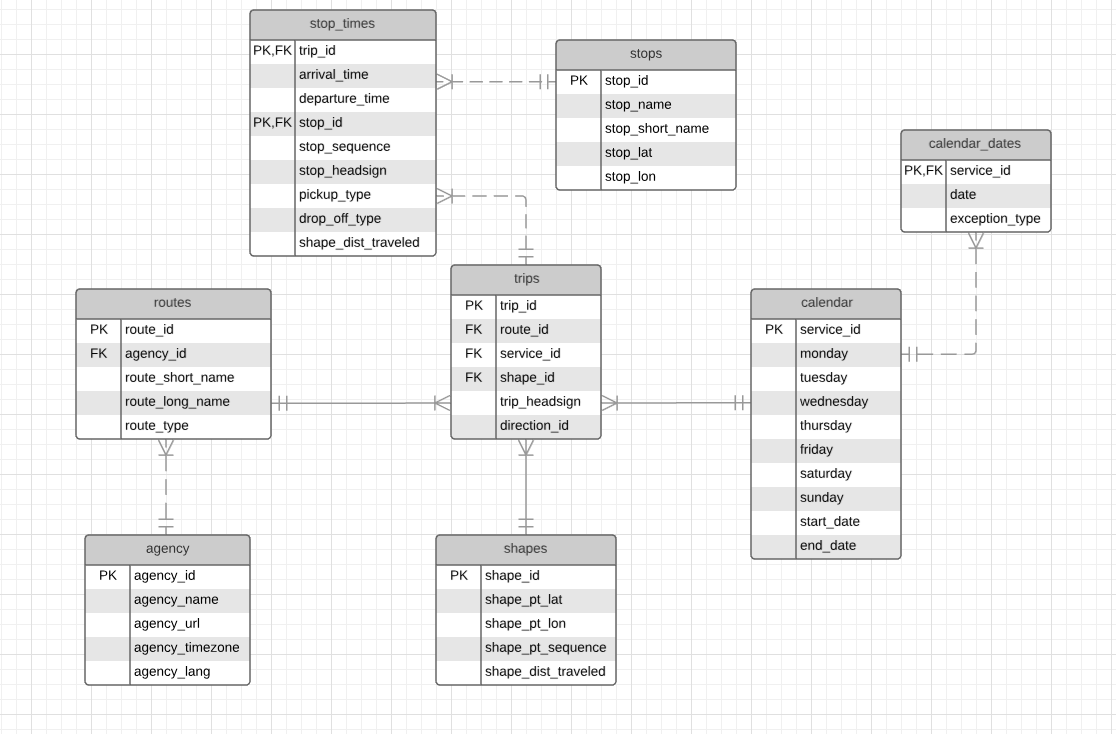

### Calculate distance of nearest train station

In [106]:
stops['stop_lat'] = stops['stop_lat'].astype('float') # converting datatype into float for calculation

In [107]:
stops['stop_lon'] = stops['stop_lon'].astype('float') # converting datatype into float for calculation

In [108]:
def train_dist(lat1, long1): # creating a function to calculate distance from each property
    dist_dict = {} # empty dictionary to store id and its distance
    distance = stops.apply(lambda x: dist_calc(lat1, long1, x['stop_lat'], x['stop_lon']), axis=1) # providing cordinates of the two locations that need to be calculated
    keys = stops.loc[distance.index, 'stop_id'] # storing stops id as key
    values = distance.values # storing stops distance as value
    dist_dict = dict(zip(keys,values)) # creating k, v pair dictionary
    val = min(dist_dict.items(), key=lambda x: x[1]) # getting the min distance from the dictionary
    return pd.Series((val[0],val[1])) # returing the id and the distance of the point from the house

In [109]:
real_estate[['stop_id','distance_to_train_station']] = real_estate.apply(lambda x: pd.Series(train_dist(x['lat'], x['lng'])), axis=1)

In [111]:
real_estate.loc[real_estate['stop_id'] == 20027, 'stop_id'] = 20023

In [112]:
real_estate.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,supermarket_id,distance_to_supermaket,stop_id,distance_to_train_station
0,40 Victoria Street,2,4,-37.783004,145.144749,2,1.4e+07,51396,house,2015,hospital_034,2.613,SC_091,1.712,S_188,1.879,19898.0,4.152
1,16 Edinburgh Street,1,2,-37.823492,145.005719,0,9.06e+06,52431,house,2015,hospital_122,0.429,SC_038,1.914,S_076,1.785,19906.0,0.481
2,24 Goldsmith Avenue,2,3,-37.716585,144.777206,1,4.455e+06,12742,house,2016,hospital_057,5.888,SC_107,2.914,S_094,1.592,20000.0,1.741
3,18/114 Warren Road,1,3,-37.991135,145.093967,2,7.536e+06,92856,house,2012,hospital_001,1.855,SC_003,2.268,S_003,1.670,19864.0,1.563
4,24 Cuthbert Street,2,4,-37.737755,144.883148,2,6.68e+06,15625,house,2009,hospital_184,1.995,SC_082,2.018,S_198,1.604,20036.0,3.489


### Calculating Transfer flag

In [113]:
# merging the gtfs individual dataframe as one gtfs dataframe where all the required information to calculate our requirement is available at once.

In [114]:
# merging stop_times and stops on stop_id key
stop_merge = pd.merge(stop_times, stops, how='left', on='stop_id')

In [115]:
# merging calendar and calendar_dates on service_id key
cal_merge = pd.merge(calendar, calendar_dates, how='left', on='service_id')

In [116]:
# merging trips and routes on route_id key
trip_route = pd.merge(trips, routes, how='left', on='route_id')

In [117]:
# merging trip_route and stop on trip_id key
trip_stops = pd.merge(trip_route, stop_merge, how='left', on='trip_id')

In [118]:
# combining all dataframes into one gtfs to access all available train infromation
gtfs = pd.merge(trip_stops, cal_merge, how='left', on='service_id')

In [119]:
gtfs

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,agency_id,route_short_name,route_long_name,route_type,...,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,date,exception_type
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0
1,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0
2,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0
3,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0
4,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0
5,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0
6,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0
7,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0
8,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0
9,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0


In [120]:
gtfs['trip_headsign'].unique()

array(['City (Flinders Street)', 'Alamein', 'Craigieburn', 'Belgrave',
       'Cranbourne', 'South Morang', 'Frankston', 'Glen Waverley',
       'Hurstbridge', 'Lilydale', 'Pakenham', 'Sandringham',
       'Stony Point', 'Sunbury', 'Upfield', 'Werribee', 'Williamstown',
       'Showgrounds/Flemington Southern Cross Station',
       'Flinders Street Southern Cross Station'], dtype=object)

In [121]:
# in below steps we are filtering out our created dataframe regarding the train info as per our required conditions

In [122]:
# only one service 'T0' runs Mon-Fri
gtfs = gtfs[gtfs['service_id'] == 'T0']

In [123]:
# trips that go to or through flinders station
gtfs = gtfs[gtfs['trip_headsign'] == 'City (Flinders Street)']

In [124]:
# trips that depart from time 7am - 9am
gtfs = gtfs[('07:00:00' >= gtfs['departure_time']) & (gtfs['departure_time'] <= '09:00:00')]

In [125]:
gtfs.columns

Index(['route_id', 'service_id', 'trip_id', 'shape_id', 'trip_headsign',
       'direction_id', 'agency_id', 'route_short_name', 'route_long_name',
       'route_type', 'arrival_time', 'departure_time', 'stop_id',
       'stop_sequence', 'stop_headsign', 'pickup_type', 'drop_off_type',
       'shape_dist_traveled', 'stop_name', 'stop_short_name', 'stop_lat',
       'stop_lon', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'start_date', 'end_date', 'date',
       'exception_type'],
      dtype='object')

In [126]:
# below lines of code is calculation if the stop has a direct train to flinders from our filtered dataframe, into a list
# then we will see if any of those stop id appears in our real_estate dataframe, if it does then transfer flag value will be set to 0
# if it doesnt appear then transfer flag values will be set to 1

In [127]:
gtfs_temp = gtfs.groupby('stop_id').sum()

In [128]:
gtfs_temp = gtfs_temp.reset_index()

In [129]:
stop_list = gtfs_temp['stop_id'].tolist()

In [130]:
stops['transfer_flag'] = 1

In [131]:
# creating a function to set the transfer flag value in our real_estate dataframe

In [132]:
def transfer_flag(row):
    stop_id = row['stop_id']
    
    if stop_id in stop_list:
        return 0
    else:
        return 1

In [133]:
stops['transfer_flag'] = stops.apply(transfer_flag, axis=1)

In [134]:
real_estate.rename(columns={'train_station_id':'stop_id'}, inplace=True) 

In [135]:
real_estate.columns

Index(['addr_street', 'bathrooms', 'bedrooms', 'lat', 'lng', 'parking_space',
       'price', 'property_id', 'property_type', 'year', 'hospital_id',
       'distance_to_hospital', 'shopping_center_id', 'distance_to_sc',
       'supermarket_id', 'distance_to_supermaket', 'stop_id',
       'distance_to_train_station'],
      dtype='object')

In [136]:
# applying the transfer flag function to our RE dataframe

In [137]:
real_estate['transfer_flag'] = real_estate.apply(transfer_flag, axis=1)

In [138]:
real_estate.rename(columns={'stop_id':'train_station_id'}, inplace=True) 

In [139]:
real_estate.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,transfer_flag
0,40 Victoria Street,2,4,-37.783004,145.144749,2,1.4e+07,51396,house,2015,hospital_034,2.613,SC_091,1.712,S_188,1.879,19898.0,4.152,0
1,16 Edinburgh Street,1,2,-37.823492,145.005719,0,9.06e+06,52431,house,2015,hospital_122,0.429,SC_038,1.914,S_076,1.785,19906.0,0.481,0
2,24 Goldsmith Avenue,2,3,-37.716585,144.777206,1,4.455e+06,12742,house,2016,hospital_057,5.888,SC_107,2.914,S_094,1.592,20000.0,1.741,0
3,18/114 Warren Road,1,3,-37.991135,145.093967,2,7.536e+06,92856,house,2012,hospital_001,1.855,SC_003,2.268,S_003,1.670,19864.0,1.563,0
4,24 Cuthbert Street,2,4,-37.737755,144.883148,2,6.68e+06,15625,house,2009,hospital_184,1.995,SC_082,2.018,S_198,1.604,20036.0,3.489,0


In [140]:
real_estate[real_estate['transfer_flag'] == 1]

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,transfer_flag


In [141]:
gtfs.columns

Index(['route_id', 'service_id', 'trip_id', 'shape_id', 'trip_headsign',
       'direction_id', 'agency_id', 'route_short_name', 'route_long_name',
       'route_type', 'arrival_time', 'departure_time', 'stop_id',
       'stop_sequence', 'stop_headsign', 'pickup_type', 'drop_off_type',
       'shape_dist_traveled', 'stop_name', 'stop_short_name', 'stop_lat',
       'stop_lon', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday',
       'saturday', 'sunday', 'start_date', 'end_date', 'date',
       'exception_type'],
      dtype='object')

In [142]:
gtfs.loc[:, ['route_id', 'service_id', 'trip_id', 'trip_headsign', 'arrival_time', 'departure_time', 'stop_id']].head()

,route_id,service_id,trip_id,trip_headsign,arrival_time,departure_time,stop_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,City (Flinders Street),05:01:00,05:01:00,19847
1,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,City (Flinders Street),05:02:00,05:02:00,19848
2,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,City (Flinders Street),05:04:00,05:04:00,19849
3,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,City (Flinders Street),05:06:00,05:06:00,19850
4,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,City (Flinders Street),05:08:00,05:08:00,19851


### Calculating Travel min to CBD

In [143]:
# in order to calculate the travel time to cbd from each station we will use similar logic that we used to calculate transfer flag.
# we will calculate travel time from each station to flinders then store it in a dictionary.
# then apply the calculated average travel time to our dataframe as per the stop id for each house.

In [144]:
flin_trains = gtfs[gtfs['stop_id'] == 19854]

In [145]:
flin_trips = flin_trains['trip_id'].tolist()

In [146]:
gtfs_flin = gtfs[gtfs['trip_id'].isin(flin_trips)]

In [147]:
gtfs_flin.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id,agency_id,route_short_name,route_long_name,route_type,...,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,date,exception_type
217,2-ALM-F-mjp-1,T0,17068379.T0.2-ALM-F-mjp-1.2.H,2-ALM-F-mjp-1.2.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0
218,2-ALM-F-mjp-1,T0,17068379.T0.2-ALM-F-mjp-1.2.H,2-ALM-F-mjp-1.2.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0
219,2-ALM-F-mjp-1,T0,17068379.T0.2-ALM-F-mjp-1.2.H,2-ALM-F-mjp-1.2.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0
220,2-ALM-F-mjp-1,T0,17068379.T0.2-ALM-F-mjp-1.2.H,2-ALM-F-mjp-1.2.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0
221,2-ALM-F-mjp-1,T0,17068379.T0.2-ALM-F-mjp-1.2.H,2-ALM-F-mjp-1.2.H,City (Flinders Street),0,1,Alamein,Alamein - City (Flinders Street),2,...,1,1,1,1,0,0,20151023,20151122,20151103.0,2.0


In [148]:
gtfs_flin.shape

(1540, 33)

In [149]:
jour_time = {} # creating empty dictionary to store stop_id and its avg travel time to flinder as k,v pair
for stops in stop_list:
    trip_stop = gtfs_flin[gtfs_flin['stop_id'] == stops]
    total_trips = trip_stop['trip_id'].tolist()
    travel_time = [] # storing travel time of each trip from a certain stop
    for each in total_trips:
        stop_dep = gtfs_flin[(gtfs_flin['trip_id'] == each) & (gtfs_flin['stop_id'] == stops)] # all trips from a stop
        dep_time = stop_dep['departure_time'].values
        stop_arriv = gtfs_flin[(gtfs_flin['trip_id'] == each) & (gtfs_flin['stop_id'] == 19854)] # all trips from a stop to flinders
        arriv_time = stop_arriv['arrival_time'].values
        if len(dep_time) != 0 and len(arriv_time) != 0:
            dep_time = pd.to_timedelta(dep_time[0]).seconds/60
            arriv_time = pd.to_timedelta(arriv_time[0]).seconds/60
            travel_mins = arriv_time - dep_time
            if travel_mins > 0:
                travel_time.append(travel_mins)
    if len(travel_time) > 0:
        jour_time[stops] = int(sum(travel_time)/len(travel_time)) # calculating the avg travel time
  

In [150]:
real_estate['train_station_id'] = real_estate['train_station_id'].astype(int)

In [151]:
# in below function if the stop_id matches with the train_station_id from the real_estate dataframe then it will return its travel time

In [152]:
def travel_mins_cbd(row):
    stop_idd = row['train_station_id']
    
    if stop_idd in jour_time.keys():
        return math.ceil(jour_time[stop_idd])
    else:
        return 0
    

In [153]:
jour_time

{15351: 48,
 15353: 44,
 19835: 19,
 19837: 21,
 19838: 23,
 19839: 26,
 19840: 28,
 19841: 6,
 19842: 6,
 19843: 6,
 19844: 71,
 19845: 69,
 19846: 67,
 19847: 35,
 19848: 34,
 19849: 32,
 19850: 30,
 19851: 28,
 19852: 26,
 19853: 22,
 19855: 61,
 19856: 59,
 19857: 56,
 19858: 52,
 19859: 50,
 19860: 48,
 19861: 46,
 19862: 44,
 19863: 41,
 19864: 38,
 19865: 36,
 19866: 34,
 19867: 63,
 19868: 60,
 19869: 58,
 19870: 55,
 19871: 51,
 19872: 31,
 19873: 35,
 19874: 33,
 19875: 30,
 19876: 62,
 19877: 57,
 19878: 53,
 19879: 49,
 19880: 79,
 19881: 72,
 19882: 67,
 19883: 65,
 19884: 61,
 19885: 57,
 19888: 52,
 19889: 49,
 19890: 47,
 19891: 44,
 19892: 24,
 19893: 26,
 19894: 28,
 19895: 30,
 19896: 31,
 19897: 36,
 19898: 38,
 19899: 41,
 19900: 44,
 19901: 46,
 19902: 48,
 19903: 21,
 19904: 19,
 19905: 17,
 19906: 12,
 19907: 9,
 19908: 8,
 19909: 11,
 19910: 13,
 19911: 15,
 19912: 17,
 19913: 42,
 19914: 40,
 19915: 37,
 19916: 34,
 19917: 32,
 19918: 30,
 19919: 28,
 19920: 2

In [154]:
real_estate['travel_min_to_CBD'] = real_estate.apply(travel_mins_cbd, axis=1) # applying the travel time function to RE dataframe

In [155]:
real_estate.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,hospital_id,distance_to_hospital,shopping_center_id,distance_to_sc,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,transfer_flag,travel_min_to_CBD
0,40 Victoria Street,2,4,-37.783004,145.144749,2,1.4e+07,51396,house,2015,hospital_034,2.613,SC_091,1.712,S_188,1.879,19898,4.152,0,38
1,16 Edinburgh Street,1,2,-37.823492,145.005719,0,9.06e+06,52431,house,2015,hospital_122,0.429,SC_038,1.914,S_076,1.785,19906,0.481,0,12
2,24 Goldsmith Avenue,2,3,-37.716585,144.777206,1,4.455e+06,12742,house,2016,hospital_057,5.888,SC_107,2.914,S_094,1.592,20000,1.741,0,37
3,18/114 Warren Road,1,3,-37.991135,145.093967,2,7.536e+06,92856,house,2012,hospital_001,1.855,SC_003,2.268,S_003,1.670,19864,1.563,0,38
4,24 Cuthbert Street,2,4,-37.737755,144.883148,2,6.68e+06,15625,house,2009,hospital_184,1.995,SC_082,2.018,S_198,1.604,20036,3.489,0,23


### Calculating Suburb

In [156]:
# we are now going to calculate suburb for each house in our dataset as per its lat and long value using shapely module

In [157]:
!pip install Shapely

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [158]:
import shapefile

In [159]:
import shapely

In [160]:
from shapely.geometry import Point # Point class
from shapely.geometry import shape # shape() is a function to convert geo objects through the interface

In [161]:
with zipfile.ZipFile('vic_suburb_boundary.zip') as vic:
    vic.extractall()

In [162]:
vic_shape = shapefile.Reader(r'C:\\Users\\Admin\\Downloads\\VIC_LOCALITY_POLYGON_shp.shp') #open the shapefile

In [163]:
shapes = vic_shape.shapes() # get all the polygons

In [164]:
vic_records = vic_shape.records()

In [165]:
def suburb(lat1, long1):
    coord = (long1, lat1)
    for loc in range(len(shapes)):
        border = shapes[loc] # get a boundary polygon
        if Point(coord).within(shape(border)): # make a point and see if it's in the polygon
            area = vic_records[loc][6] # get the field of the corresponding record
            return str(area)

In [166]:
real_estate['suburb'] = real_estate.apply(lambda x: pd.Series(suburb(x['lat'],x['lng'])), axis=1)

In [167]:
real_estate[['addr_street','suburb', 'lat', 'lng']].head()

,addr_street,suburb,lat,lng
0,40 Victoria Street,DONCASTER,-37.783004,145.144749
1,16 Edinburgh Street,RICHMOND,-37.823492,145.005719
2,24 Goldsmith Avenue,DELAHEY,-37.716585,144.777206
3,18/114 Warren Road,MORDIALLOC,-37.991135,145.093967
4,24 Cuthbert Street,NIDDRIE,-37.737755,144.883148


###### Checking the validity of the suburb using Google Maps for 40 Victoria St, Doncaster (lat, long = -37.783004	145.144749)

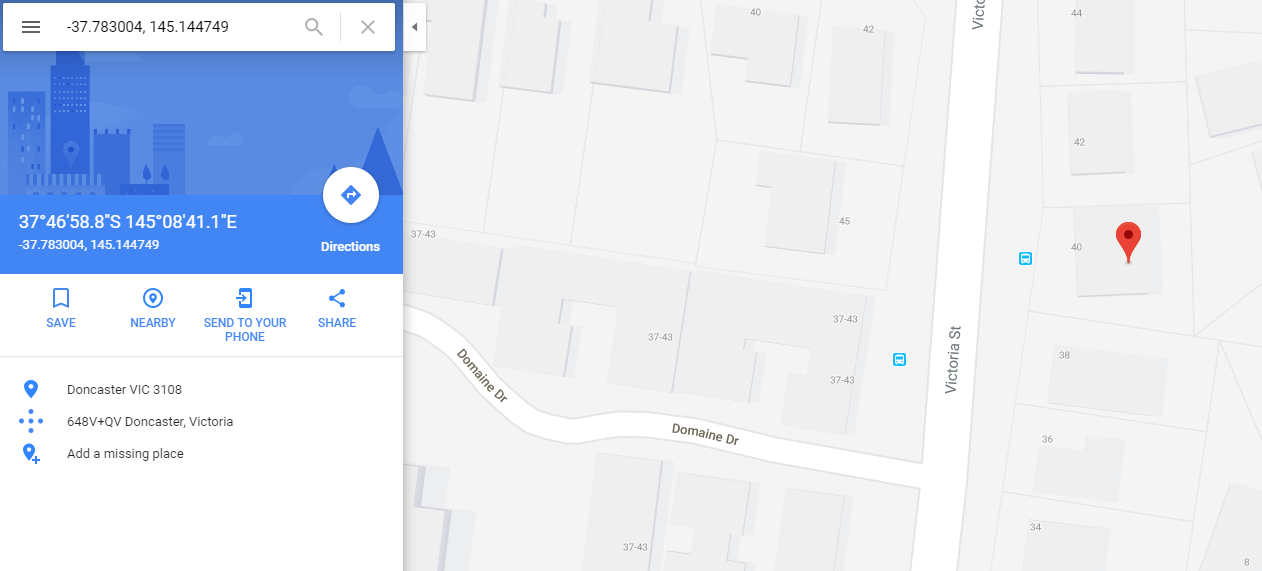

###### Creating a function to capitalize suburb names to match with the sample output file

In [168]:
def capitalise(suburb):
    
    suburb = str(suburb)
    suburb = suburb.split(' ') # splittling the suburb name
    if len(suburb) > 1: # checking if the suburb name is two word name
        suburb = suburb[0].capitalize() + ' ' + suburb[-1].capitalize() # applying capitalise function to the name
        return suburb # return capitalize suburb name
    else:
        suburb = suburb[0].capitalize()
        return suburb

In [169]:
real_estate['suburb'] = real_estate.apply(lambda x: pd.Series(capitalise(x['suburb'])), axis = 1)

In [170]:
real_estate['suburb'].head()

0     Doncaster
1      Richmond
2       Delahey
3    Mordialloc
4       Niddrie
Name: suburb, dtype: object

In [171]:
real_estate.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,...,distance_to_hospital,shopping_center_id,distance_to_sc,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,transfer_flag,travel_min_to_CBD,suburb
0,40 Victoria Street,2,4,-37.783004,145.144749,2,1.4e+07,51396,house,2015,...,2.613,SC_091,1.712,S_188,1.879,19898,4.152,0,38,Doncaster
1,16 Edinburgh Street,1,2,-37.823492,145.005719,0,9.06e+06,52431,house,2015,...,0.429,SC_038,1.914,S_076,1.785,19906,0.481,0,12,Richmond
2,24 Goldsmith Avenue,2,3,-37.716585,144.777206,1,4.455e+06,12742,house,2016,...,5.888,SC_107,2.914,S_094,1.592,20000,1.741,0,37,Delahey
3,18/114 Warren Road,1,3,-37.991135,145.093967,2,7.536e+06,92856,house,2012,...,1.855,SC_003,2.268,S_003,1.670,19864,1.563,0,38,Mordialloc
4,24 Cuthbert Street,2,4,-37.737755,144.883148,2,6.68e+06,15625,house,2009,...,1.995,SC_082,2.018,S_198,1.604,20036,3.489,0,23,Niddrie


In [172]:
real_estate[['distance_to_sc', 'distance_to_hospital', 'distance_to_supermaket', 'distance_to_train_station']] = real_estate[['distance_to_sc', 'distance_to_hospital', 'distance_to_supermaket', 'distance_to_train_station']]*1000

In [173]:
real_estate.head()

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,...,distance_to_hospital,shopping_center_id,distance_to_sc,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,transfer_flag,travel_min_to_CBD,suburb
0,40 Victoria Street,2,4,-37.783004,145.144749,2,1.4e+07,51396,house,2015,...,2613.0,SC_091,1712.0,S_188,1879.0,19898,4152.0,0,38,Doncaster
1,16 Edinburgh Street,1,2,-37.823492,145.005719,0,9.06e+06,52431,house,2015,...,429.0,SC_038,1914.0,S_076,1785.0,19906,481.0,0,12,Richmond
2,24 Goldsmith Avenue,2,3,-37.716585,144.777206,1,4.455e+06,12742,house,2016,...,5888.0,SC_107,2914.0,S_094,1592.0,20000,1741.0,0,37,Delahey
3,18/114 Warren Road,1,3,-37.991135,145.093967,2,7.536e+06,92856,house,2012,...,1855.0,SC_003,2268.0,S_003,1670.0,19864,1563.0,0,38,Mordialloc
4,24 Cuthbert Street,2,4,-37.737755,144.883148,2,6.68e+06,15625,house,2009,...,1995.0,SC_082,2018.0,S_198,1604.0,20036,3489.0,0,23,Niddrie


In [174]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2004 entries, 0 to 1002
Data columns (total 21 columns):
addr_street                  2004 non-null object
bathrooms                    2004 non-null object
bedrooms                     2004 non-null object
lat                          2003 non-null float64
lng                          2003 non-null float64
parking_space                2004 non-null object
price                        2004 non-null object
property_id                  2004 non-null object
property_type                2004 non-null object
year                         2004 non-null object
hospital_id                  2004 non-null object
distance_to_hospital         2003 non-null float64
shopping_center_id           2004 non-null object
distance_to_sc               2003 non-null float64
supermarket_id               2004 non-null object
distance_to_supermaket       2003 non-null float64
train_station_id             2004 non-null int32
distance_to_train_station    2003 non-n

In [182]:
null_data = real_estate[real_estate.isnull().any(axis=1)]

In [183]:
null_data

,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,year,...,distance_to_hospital,shopping_center_id,distance_to_sc,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,transfer_flag,travel_min_to_CBD,suburb
58,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,...,NaN,SC_001,NaN,S_001,NaN,15351.0,NaN,0,48,Nan


In [184]:
real_estate.drop(58, inplace=True)#df.drop(571, inplace=True)

In [185]:
real_estate.isnull().sum()

addr_street                  0
bathrooms                    0
bedrooms                     0
lat                          0
lng                          0
parking_space                0
price                        0
property_id                  0
property_type                0
year                         0
hospital_id                  0
distance_to_hospital         0
shopping_center_id           0
distance_to_sc               0
supermarket_id               0
distance_to_supermaket       0
train_station_id             0
distance_to_train_station    0
transfer_flag                0
travel_min_to_CBD            0
suburb                       0
dtype: int64

In [186]:
real_estate.shape

(2002, 21)

In [187]:
real_estate[['bathrooms','bedrooms','distance_to_hospital','distance_to_sc','distance_to_supermaket','distance_to_train_station','parking_space','price','property_id','train_station_id','year']] = real_estate[['bathrooms','bedrooms','distance_to_hospital','distance_to_sc','distance_to_supermaket','distance_to_train_station','parking_space','price','property_id','train_station_id','year']].astype(float)

In [190]:
real_estate[['bathrooms','bedrooms','distance_to_hospital','distance_to_sc','distance_to_supermaket','distance_to_train_station','parking_space','price','property_id','train_station_id','year']] = real_estate[['bathrooms','bedrooms','distance_to_hospital','distance_to_sc','distance_to_supermaket','distance_to_train_station','parking_space','price','property_id','train_station_id','year']].astype(np.int64)

In [191]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 1002
Data columns (total 21 columns):
addr_street                  2002 non-null object
bathrooms                    2002 non-null int64
bedrooms                     2002 non-null int64
lat                          2002 non-null float64
lng                          2002 non-null float64
parking_space                2002 non-null int64
price                        2002 non-null int64
property_id                  2002 non-null int64
property_type                2002 non-null object
year                         2002 non-null int64
hospital_id                  2002 non-null object
distance_to_hospital         2002 non-null int64
shopping_center_id           2002 non-null object
distance_to_sc               2002 non-null int64
supermarket_id               2002 non-null object
distance_to_supermaket       2002 non-null int64
train_station_id             2002 non-null int64
distance_to_train_station    2002 non-null int64
tr

In [343]:
sample = pd.read_csv(r'C:\Users\Admin\Downloads\sample.csv')

In [344]:
sam_col = sample.columns.tolist()

In [345]:
sam_col = sam_col[1:]

In [346]:
sam_col

['property_id',
 'lat',
 'lng',
 'addr_street',
 'suburb',
 'price',
 'property_type',
 'year',
 'bedrooms',
 'bathrooms',
 'parking_space',
 'shopping_center_id',
 'distance_to_sc',
 'train_station_id',
 'distance_to_train_station',
 'travel_min_to_CBD',
 'transfer_flag',
 'hospital_id',
 'distance_to_hospital',
 'supermarket_id',
 'distance_to_supermaket']

In [347]:
real_estate = real_estate[sam_col]

In [348]:
real_estate.head()

,property_id,lat,lng,addr_street,suburb,price,property_type,year,bedrooms,bathrooms,...,shopping_center_id,distance_to_sc,train_station_id,distance_to_train_station,travel_min_to_CBD,transfer_flag,hospital_id,distance_to_hospital,supermarket_id,distance_to_supermaket
0,51396,-37.783004,145.144749,40 Victoria Street,Doncaster,14000000,house,2015,4,2,...,SC_091,1712,19898,4152,38,0,hospital_034,2613,S_188,1879
1,52431,-37.823492,145.005719,16 Edinburgh Street,Richmond,9060000,house,2015,2,1,...,SC_038,1914,19906,481,12,0,hospital_122,429,S_076,1785
2,12742,-37.716585,144.777206,24 Goldsmith Avenue,Delahey,4455000,house,2016,3,2,...,SC_107,2914,20000,1741,37,0,hospital_057,5888,S_094,1592
3,92856,-37.991135,145.093967,18/114 Warren Road,Mordialloc,7536000,house,2012,3,1,...,SC_003,2268,19864,1563,38,0,hospital_001,1855,S_003,1670
4,15625,-37.737755,144.883148,24 Cuthbert Street,Niddrie,6680000,house,2009,4,2,...,SC_082,2017,20036,3489,23,0,hospital_184,1995,S_198,1604


In [1]:
# now that we have all the required information and correct unit values and correct datatypes.
# We can finally export the solution file

In [349]:
real_estate.to_csv('29378966_solution.csv', encoding='utf-8', index=True)

In [350]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 1002
Data columns (total 21 columns):
property_id                  2002 non-null int64
lat                          2002 non-null float64
lng                          2002 non-null float64
addr_street                  2002 non-null object
suburb                       2002 non-null object
price                        2002 non-null int64
property_type                2002 non-null object
year                         2002 non-null int64
bedrooms                     2002 non-null int64
bathrooms                    2002 non-null int64
parking_space                2002 non-null int64
shopping_center_id           2002 non-null object
distance_to_sc               2002 non-null int64
train_station_id             2002 non-null int64
distance_to_train_station    2002 non-null int64
travel_min_to_CBD            2002 non-null int64
transfer_flag                2002 non-null int64
hospital_id                  2002 non-null object
di

# Task 2: Data reshaping

In [ ]:
# In this task we need to study the effect of different normalization/transformation methods (i.e.standardization,..
#..minmax normalization, log, power and sqrt transformation) on the “price”
#..attribute and observe and explain their effect on the price distribution.

In [210]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn import preprocessing
%matplotlib inline

In [213]:
df1 = pd.read_csv(r'C:\Users\Admin\Downloads\29378966_solution.csv')

In [217]:
# getting standardization of price and adding it in the dataset

In [214]:
std_scale = preprocessing.StandardScaler().fit(df1[['price']])
df1_std = std_scale.transform(df1[['price']]) # an array not a df
df1_std[0:5]

array([[ 0.82416105],
       [-0.01445231],
       [-0.79619614],
       [-0.27316623],
       [-0.41848061]])

In [219]:
df1['std_price'] = df1_std[:,:]

In [220]:
df1.head()

,Unnamed: 0,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,shopping_center_id,distance_to_sc,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,transfer_flag,travel_min_to_CBD,suburb,std_price
0,0,40 Victoria Street,2,4,-37.783004,145.144749,2,14000000,51396,house,...,SC_091,1712,S_188,1879,19898,4152,0,38,Doncaster,0.824161
1,1,16 Edinburgh Street,1,2,-37.823492,145.005719,0,9060000,52431,house,...,SC_038,1914,S_076,1785,19906,481,0,12,Richmond,-0.014452
2,2,24 Goldsmith Avenue,2,3,-37.716585,144.777206,1,4455000,12742,house,...,SC_107,2914,S_094,1592,20000,1741,0,37,Delahey,-0.796196
3,3,18/114 Warren Road,1,3,-37.991135,145.093967,2,7536000,92856,house,...,SC_003,2268,S_003,1670,19864,1563,0,38,Mordialloc,-0.273166
4,4,24 Cuthbert Street,2,4,-37.737755,144.883148,2,6680000,15625,house,...,SC_082,2017,S_198,1604,20036,3489,0,23,Niddrie,-0.418481


In [ ]:
# getting minmax of price and adding it in the dataset

In [218]:
minmax_scale = preprocessing.MinMaxScaler().fit(df1[['price']])
df1_minmax = minmax_scale.transform(df1[['price']]) # an array not a df
df1_minmax[0:5]

array([[0.29381327],
       [0.18267717],
       [0.07907762],
       [0.14839145],
       [0.12913386]])

In [221]:
df1['minmax_price'] = df1_minmax

In [222]:
df1.head()

,Unnamed: 0,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,distance_to_sc,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,transfer_flag,travel_min_to_CBD,suburb,std_price,minmax_price
0,0,40 Victoria Street,2,4,-37.783004,145.144749,2,14000000,51396,house,...,1712,S_188,1879,19898,4152,0,38,Doncaster,0.824161,0.293813
1,1,16 Edinburgh Street,1,2,-37.823492,145.005719,0,9060000,52431,house,...,1914,S_076,1785,19906,481,0,12,Richmond,-0.014452,0.182677
2,2,24 Goldsmith Avenue,2,3,-37.716585,144.777206,1,4455000,12742,house,...,2914,S_094,1592,20000,1741,0,37,Delahey,-0.796196,0.079078
3,3,18/114 Warren Road,1,3,-37.991135,145.093967,2,7536000,92856,house,...,2268,S_003,1670,19864,1563,0,38,Mordialloc,-0.273166,0.148391
4,4,24 Cuthbert Street,2,4,-37.737755,144.883148,2,6680000,15625,house,...,2017,S_198,1604,20036,3489,0,23,Niddrie,-0.418481,0.129134


In [ ]:
# getting sqrt of price and adding it in the dataset

In [224]:
df1['sqrt_price'] = None
i = 0
for row in df1.iterrows():
    df1['sqrt_price'].at[i] = math.sqrt(df1['price'][i])
    i += 1


In [225]:
df1.head()

,Unnamed: 0,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,supermarket_id,distance_to_supermaket,train_station_id,distance_to_train_station,transfer_flag,travel_min_to_CBD,suburb,std_price,minmax_price,sqrt_price
0,0,40 Victoria Street,2,4,-37.783004,145.144749,2,14000000,51396,house,...,S_188,1879,19898,4152,0,38,Doncaster,0.824161,0.293813,3741.66
1,1,16 Edinburgh Street,1,2,-37.823492,145.005719,0,9060000,52431,house,...,S_076,1785,19906,481,0,12,Richmond,-0.014452,0.182677,3009.98
2,2,24 Goldsmith Avenue,2,3,-37.716585,144.777206,1,4455000,12742,house,...,S_094,1592,20000,1741,0,37,Delahey,-0.796196,0.079078,2110.69
3,3,18/114 Warren Road,1,3,-37.991135,145.093967,2,7536000,92856,house,...,S_003,1670,19864,1563,0,38,Mordialloc,-0.273166,0.148391,2745.18
4,4,24 Cuthbert Street,2,4,-37.737755,144.883148,2,6680000,15625,house,...,S_198,1604,20036,3489,0,23,Niddrie,-0.418481,0.129134,2584.57


In [ ]:
# getting square power of price and adding it in the dataset

In [227]:
df1['power_price'] = None
i = 0
for row in df1.iterrows():
    df1['power_price'].at[i] = math.pow(df1['price'][i], 2)
    i += 1

In [228]:
df1.head()

,Unnamed: 0,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,distance_to_supermaket,train_station_id,distance_to_train_station,transfer_flag,travel_min_to_CBD,suburb,std_price,minmax_price,sqrt_price,power_price
0,0,40 Victoria Street,2,4,-37.783004,145.144749,2,14000000,51396,house,...,1879,19898,4152,0,38,Doncaster,0.824161,0.293813,3741.66,1.96e+14
1,1,16 Edinburgh Street,1,2,-37.823492,145.005719,0,9060000,52431,house,...,1785,19906,481,0,12,Richmond,-0.014452,0.182677,3009.98,8.20836e+13
2,2,24 Goldsmith Avenue,2,3,-37.716585,144.777206,1,4455000,12742,house,...,1592,20000,1741,0,37,Delahey,-0.796196,0.079078,2110.69,1.9847e+13
3,3,18/114 Warren Road,1,3,-37.991135,145.093967,2,7536000,92856,house,...,1670,19864,1563,0,38,Mordialloc,-0.273166,0.148391,2745.18,5.67913e+13
4,4,24 Cuthbert Street,2,4,-37.737755,144.883148,2,6680000,15625,house,...,1604,20036,3489,0,23,Niddrie,-0.418481,0.129134,2584.57,4.46224e+13


In [ ]:
# getting log of price and adding it in the dataset

In [229]:
df1['log_price'] = None
i = 0
for row in df1.iterrows():
    df1['log_price'].at[i] = math.log(df1['price'][i])
    i += 1


In [230]:
df1.head()

,Unnamed: 0,addr_street,bathrooms,bedrooms,lat,lng,parking_space,price,property_id,property_type,...,train_station_id,distance_to_train_station,transfer_flag,travel_min_to_CBD,suburb,std_price,minmax_price,sqrt_price,power_price,log_price
0,0,40 Victoria Street,2,4,-37.783004,145.144749,2,14000000,51396,house,...,19898,4152,0,38,Doncaster,0.824161,0.293813,3741.66,1.96e+14,16.4546
1,1,16 Edinburgh Street,1,2,-37.823492,145.005719,0,9060000,52431,house,...,19906,481,0,12,Richmond,-0.014452,0.182677,3009.98,8.20836e+13,16.0194
2,2,24 Goldsmith Avenue,2,3,-37.716585,144.777206,1,4455000,12742,house,...,20000,1741,0,37,Delahey,-0.796196,0.079078,2110.69,1.9847e+13,15.3095
3,3,18/114 Warren Road,1,3,-37.991135,145.093967,2,7536000,92856,house,...,19864,1563,0,38,Mordialloc,-0.273166,0.148391,2745.18,5.67913e+13,15.8352
4,4,24 Cuthbert Street,2,4,-37.737755,144.883148,2,6680000,15625,house,...,20036,3489,0,23,Niddrie,-0.418481,0.129134,2584.57,4.46224e+13,15.7146


In [231]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 27 columns):
Unnamed: 0                   2002 non-null int64
addr_street                  2002 non-null object
bathrooms                    2002 non-null int64
bedrooms                     2002 non-null int64
lat                          2002 non-null float64
lng                          2002 non-null float64
parking_space                2002 non-null int64
price                        2002 non-null int64
property_id                  2002 non-null int64
property_type                2002 non-null object
year                         2002 non-null int64
hospital_id                  2002 non-null object
distance_to_hospital         2002 non-null int64
shopping_center_id           2002 non-null object
distance_to_sc               2002 non-null int64
supermarket_id               2002 non-null object
distance_to_supermaket       2002 non-null int64
train_station_id             2002 non-null int64
di

### Original Distribution

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


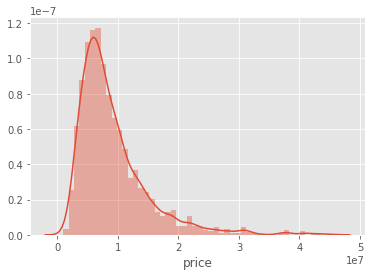

In [295]:
sns.distplot(df1['price'])

In [296]:
x_train, x_test, y_train, y_test = train_test_split(df1[['bedrooms', 'bathrooms', 'parking_space']],
                                                    df1.price,test_size=0.2,
                                                    random_state=1234)

In [297]:
# creating linear regression model
lr_model = LinearRegression()

In [298]:
lr_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [299]:
# print the r squared value of the created LR model

In [300]:
print(lr_model.score(x_test, y_test))

0.0779651861365358


In [301]:
y_pred = lr_model.predict(x_test)
mean_squared_error(y_pred, y_test)

31726092144117.836

### Sqrt Transformed Distribution

In [302]:
df1['sqrt_price'] = np.sqrt(df1.price)

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


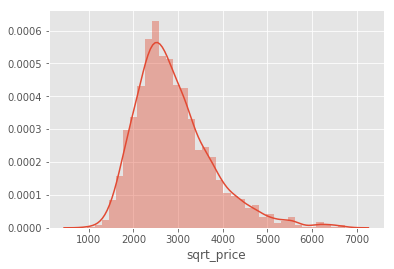

In [303]:
sns.distplot(df1.sqrt_price)

In [304]:
x_train, x_test, y_train, y_test = train_test_split(df1[['bedrooms', 'bathrooms', 'parking_space']],
                                                    df1.sqrt_price,test_size=0.2,
                                                    random_state=1234)

In [305]:
# creating linear regression model
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

# print the r squared value of the created LR model
print(lr_model.score(x_test, y_test))

0.07168742457498178


In [306]:
y_pred = lr_model.predict(x_test)
mean_squared_error(y_pred, y_test)

656082.8678001894

### Log Transformed Distribution

In [307]:
df1['log_price'] = np.log(df1.price)

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


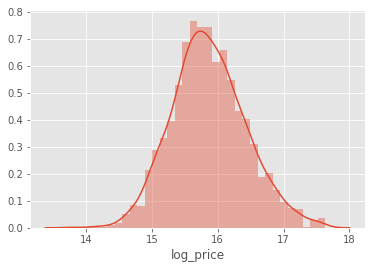

In [308]:
sns.distplot(df1.log_price)

In [309]:
x_train, x_test, y_train, y_test = train_test_split(df1[['bedrooms', 'bathrooms', 'parking_space']],
                                                    df1.log_price,test_size=0.2,
                                                    random_state=1234)

In [310]:
# creating linear regression model
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

# print the r squared value of the created LR model
print(lr_model.score(x_test, y_test))

0.06059824665885383


In [311]:
y_pred = lr_model.predict(x_test)
mean_squared_error(y_pred, y_test)

0.28102445751839267

### Power Transformed Distribution

In [312]:
df1['power_price'] = np.square(df1.price)

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


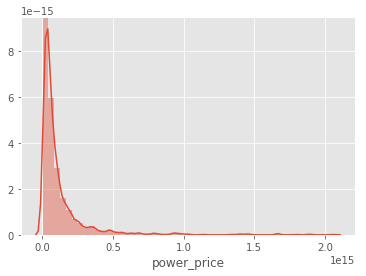

In [313]:
sns.distplot(df1.power_price)

In [314]:
x_train, x_test, y_train, y_test = train_test_split(df1[['bedrooms', 'bathrooms', 'parking_space']],
                                                    df1.power_price,test_size=0.2,
                                                    random_state=1234)

In [315]:
# creating linear regression model
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

# print the r squared value of the created LR model
print(lr_model.score(x_test, y_test))

0.07173083376192357


In [316]:
y_pred = lr_model.predict(x_test)
mean_squared_error(y_pred, y_test)

3.776827207098859e+28

### Standardization Transformed Distribution

In [317]:
df1['std_price'] = (df1.price - df1.price.mean()) / df1.price.std()

In [318]:
df1['tot_rooms'] = df1.bedrooms + df1.bathrooms + df1.parking_space

In [319]:
print('Z score is: ', df1.std_price.corr(df1.tot_rooms))

Z score is:  0.2506967689065165


In [320]:
print('Correlation: ', df1.price.corr(df1.tot_rooms))

Correlation:  0.25069676890651643


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


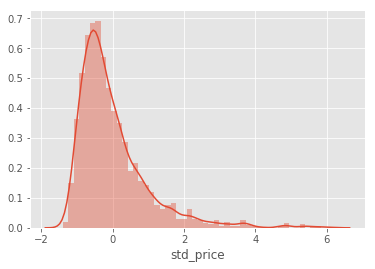

In [321]:
sns.distplot(df1['std_price'])

In [322]:
x_train, x_test, y_train, y_test = train_test_split(df1[['bedrooms', 'bathrooms', 'parking_space']],
                                                    df1.std_price,test_size=0.2,
                                                    random_state=1234)

In [323]:
# creating linear regression model
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

# print the r squared value of the created LR model
print(lr_model.score(x_test, y_test))

0.07796518613653569


In [324]:
y_pred = lr_model.predict(x_test)
mean_squared_error(y_pred, y_test)

0.9138380867395938

### Minmax Transformed Distribution

In [325]:
# Minmax normalisation
df1['minmax_price'] = (df1.price - df1.price.min()) / (df1.price.max() - df1.price.min())

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


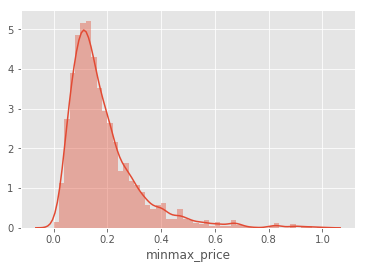

In [326]:
sns.distplot(df1['minmax_price'])

In [327]:
x_train, x_test, y_train, y_test = train_test_split(df1[['bedrooms', 'bathrooms', 'parking_space']],
                                                    df1.minmax_price,test_size=0.2,
                                                    random_state=1234)

In [328]:
# creating linear regression model
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

# print the r squared value of the created LR model
print(lr_model.score(x_test, y_test))

0.07796518613653547


In [330]:
y_pred = lr_model.predict(x_test)
mean_squared_error(y_pred, y_test)

0.016057319567172244

### Conclusion of Linear Model

- As we can analyse from all above models we can conclude that log transformed distribution fits best to our derived dataset of real estate.

- We can also analyse that mean squared value of the log transformed distribution coming the best.

We can also try to see if there is any correclation between the asked attributes of rooms that is total rooms as well as we will also see if the price affects individually with bedrooms, bathrooms or parking space.

In [329]:
plt.style.use('ggplot')

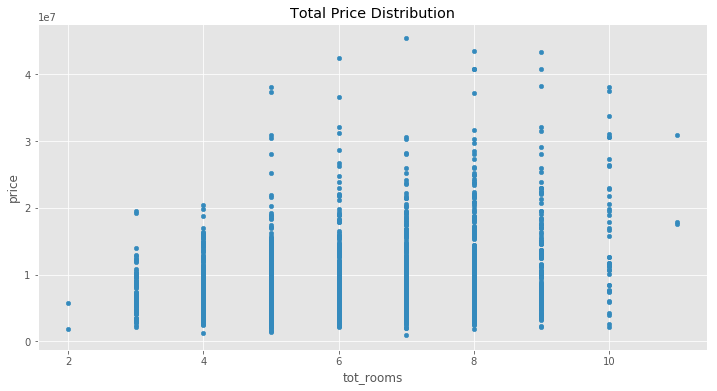

In [288]:
df1.plot.scatter(x='tot_rooms', y='price', title='Total Price Distribution', figsize=(12,6))

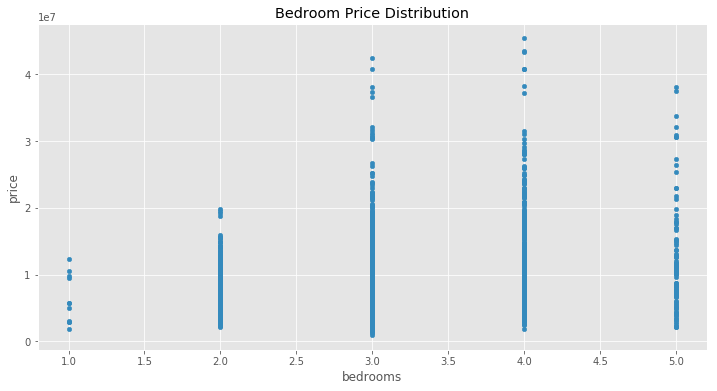

In [289]:
df1.plot.scatter(x='bedrooms', y='price', title='Bedroom Price Distribution', figsize=(12,6))

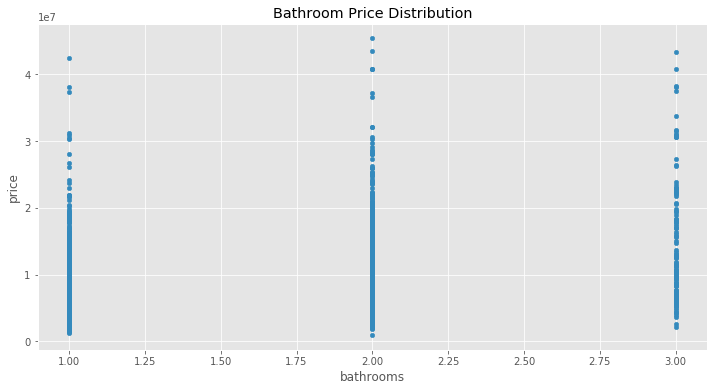

In [290]:
df1.plot.scatter(x='bathrooms', y='price', title='Bathroom Price Distribution', figsize=(12,6))

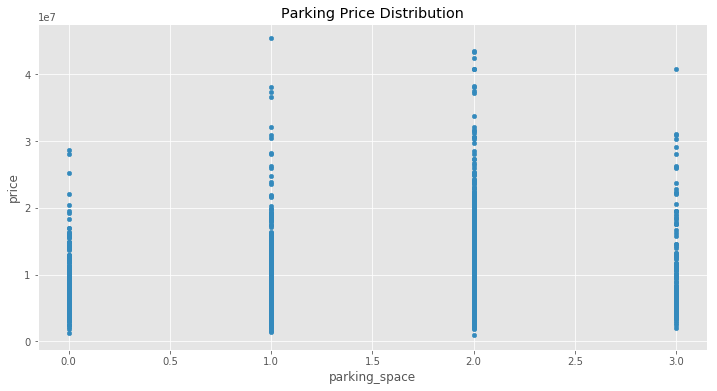

In [291]:
df1.plot.scatter(x='parking_space', y='price', title='Parking Price Distribution', figsize=(12,6))

In [270]:
df1.tot_rooms.corr(df1.price)

0.25069676890651643

In [271]:
df1.tot_rooms.corr(np.log(df1.price))

0.23364885192868876

In [272]:
df1.tot_rooms.corr(np.square(df1.price))

0.22775887226898486

In [274]:
df1.tot_rooms.corr(np.sqrt(df1.price))

0.24727673604924583

### Conclusion Correlation

- As we can see from above that the rooms are NOT corelating with the price of the house.

# Summary

- We first began with reading and converting provided files into dataframes

- Then we merged the real estate information dataframes into one dataframe

- We checked for duplicates in the real estate dataframe and performed a little data cleaning

- We then started calculating nearest amenities such as hospitals, shopping centre, train station, etc from each house

- Then we read the provided GTFS train station information files and created dataframe of each file and combined those dataframes into one GTFS dataframe for travel time calculation

- Then finally we calculated the suburbs of each house and inputed the suburb information in our real estate dataframe

- Once we got the required house information in the dataframe we exported the csv file

- Lastly we performed normalisation on the exported data to perform analysis to analyse price trend with the rooms

# References

- stackoverflow.com. (2016). pd.read_html() imports a list rather than a dataframe. [online] 
Available at:
https://stackoverflow.com/questions/39710903/pd-read-html-imports-a-list-rather-than-a-dataframe [Accessed 16 Oct. 2018]

- python.org.(2018). The ElementTree XML API.[online] Available at: https://docs.python.org/2/library/xml.etree.elementtree.html [Accessed 18 Oct. 2018]

- pydata.org. (2018). Merge, join, and concatenate. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/merging.html [Accessed on 20 Oct. 2018]

- Eyana.me. (30 June 2018). Calculate the nearest lat-long distance using Python. [online] Available at: http://eyana.me/nearest-distance-python/ [Accessed on 20 Oct. 2018]

- python.org. (24 Oct. 2018). Common pathname manipulations. [online] Available at: https://docs.python.org/2/library/os.path.html [Accessed on 24 Oct. 2018]

- stcakexchange.com. (2017). Finding out if coordinate is within shapefile (.shp) using pyshp?. [online] Available at: https://gis.stackexchange.com/questions/250172/finding-out-if-coordinate-is-within-shapefile-shp-using-pyshp [Accessed on 25 Oct. 2018]